# Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [2]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


Analisando acima verificamos que são duas colunas, sendo elas: 'mes' = Data (Ano/Mês/Dia), 'vendas' = Quantidade de vendas no mês.

In [3]:
alucar = pd.read_csv('alucar.csv')

Precisamos descobrir se com o passar do tempo a empresa está vendendo mais ou vendendo menos.

In [4]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [5]:
print(f'Quantidade de dados NULOS: {alucar.isna().sum().sum()}')

Quantidade de dados NULOS: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

Como iremos trabalhar com Time Series, precisamos converter o tipo da coluna 'mes' para o tipo datetime.

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [8]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

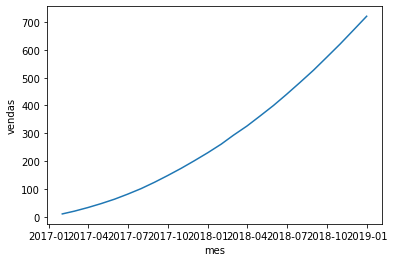

In [10]:
sns.lineplot(x='mes', y='vendas', data=alucar)

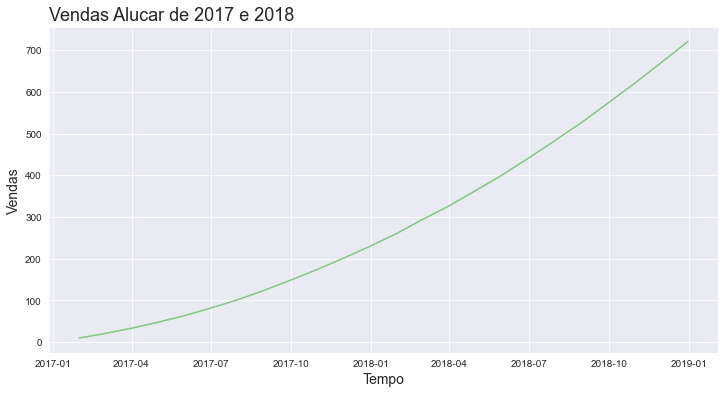

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas', fontsize=14)
ax = ax

Para descobrir se as vendas estão crescendo mensalmente pegamos a coluna 'vendas' e subtraimos pela linha anterior, sendo assim teremos a diferença mensal das vendas e conseguiremos plotar um gráfico entendendo as vendas mes a mes.

In [12]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


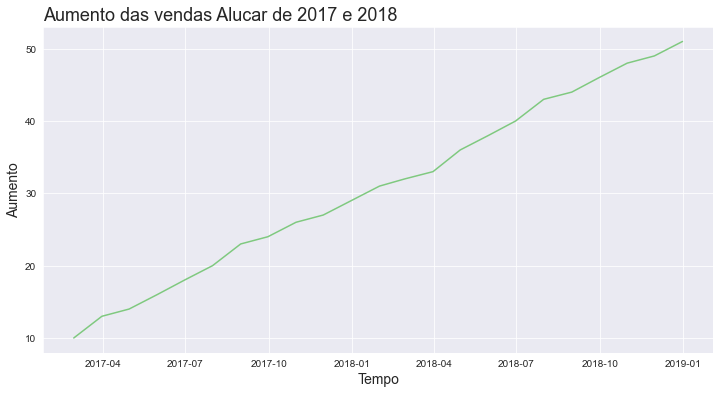

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [14]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

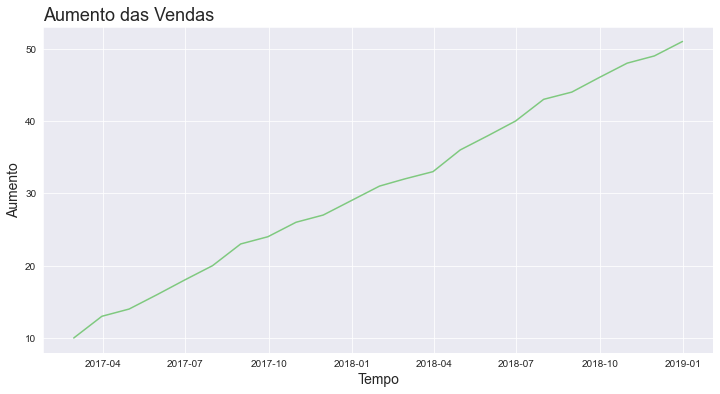

In [15]:
plotar('Aumento das Vendas', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

Agora iremos descobrir a aceleração das vendas, para fazer isso iremos calcular a diferença em uma nova coluna chamada 'aceleracao', nessa coluna faremos o mesmo processo que fizemos em 'mes', porém agora para 'aumento'

In [16]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


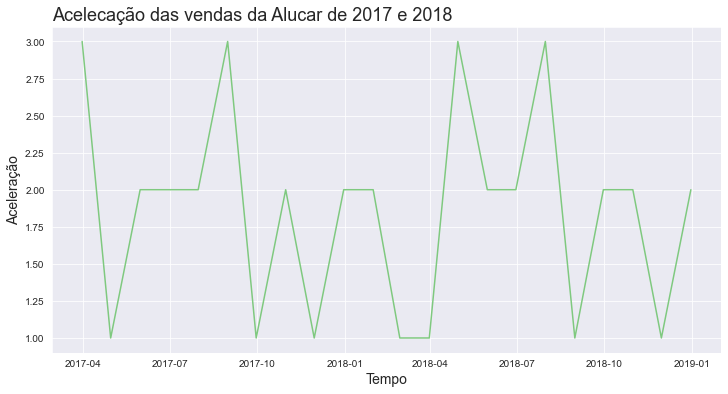

In [17]:
plotar('Acelecação das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

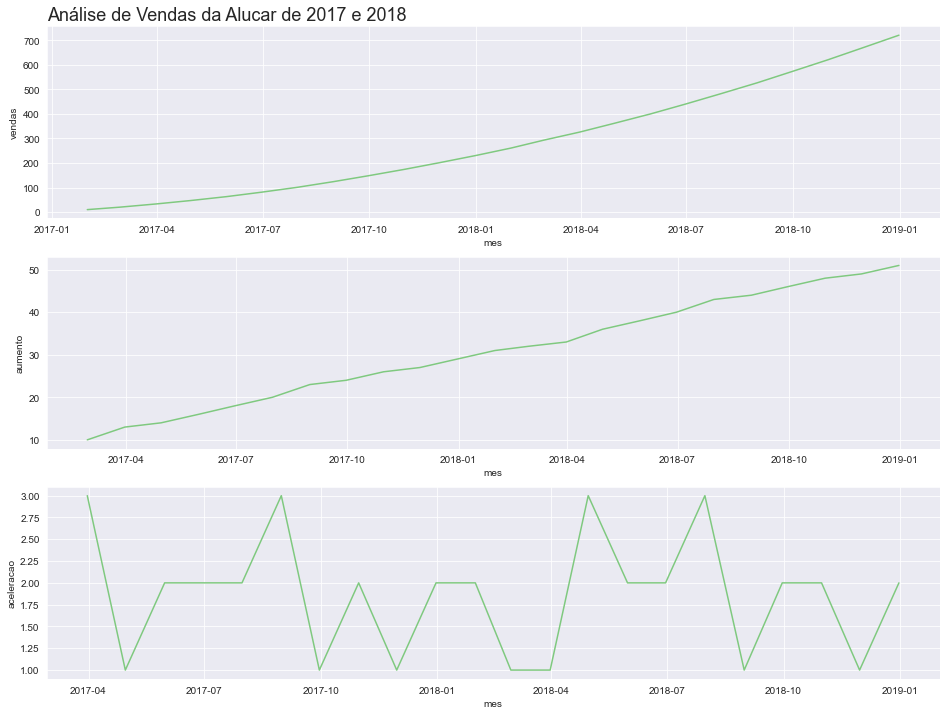

In [18]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [19]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax
    

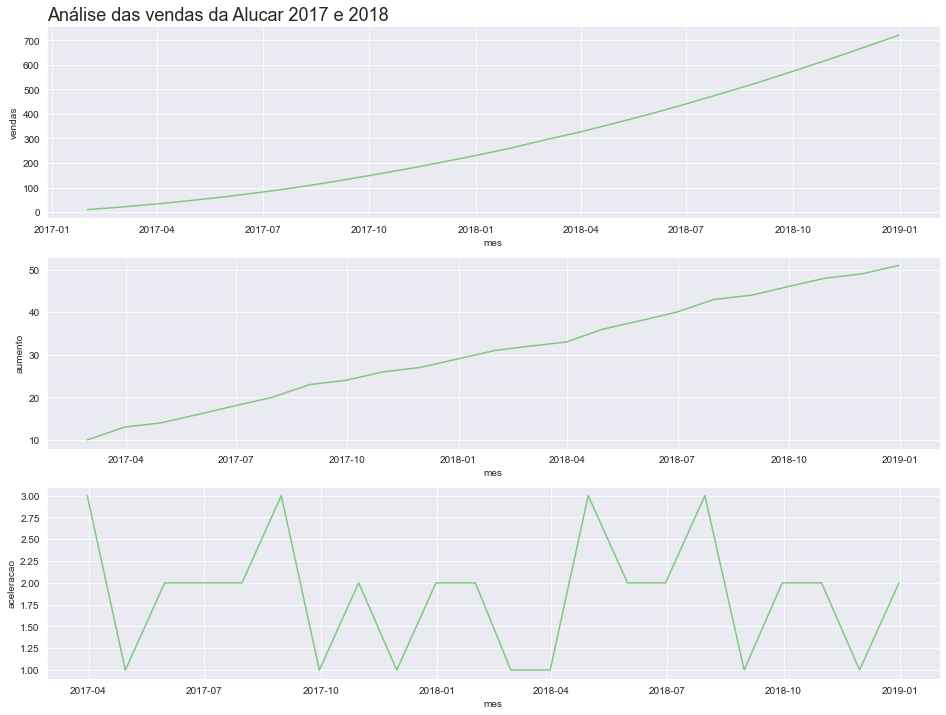

In [20]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das vendas da Alucar 2017 e 2018')

In [21]:
from pandas.plotting import autocorrelation_plot

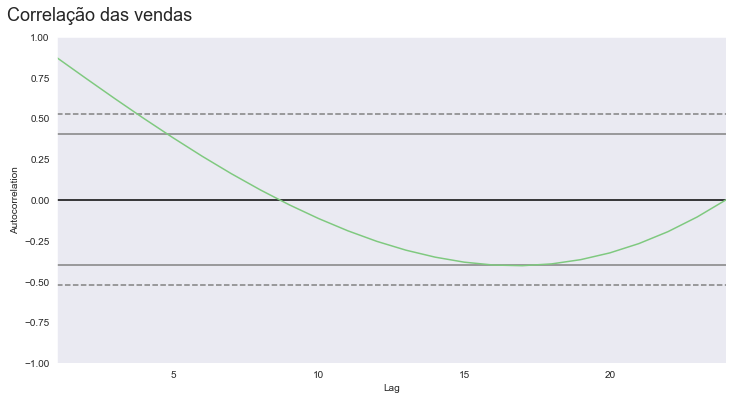

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.175, y= 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

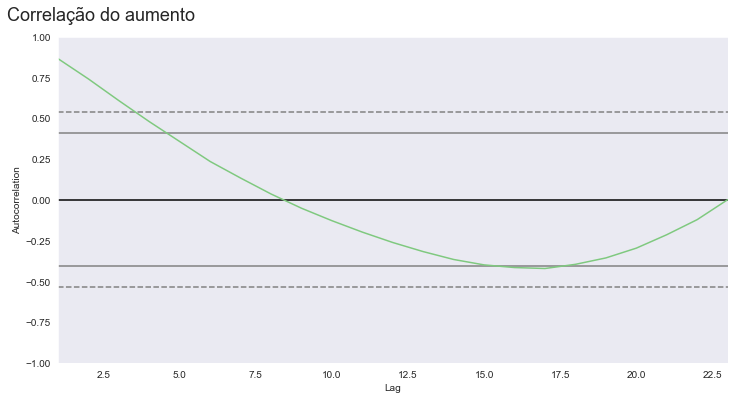

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.175, y= 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

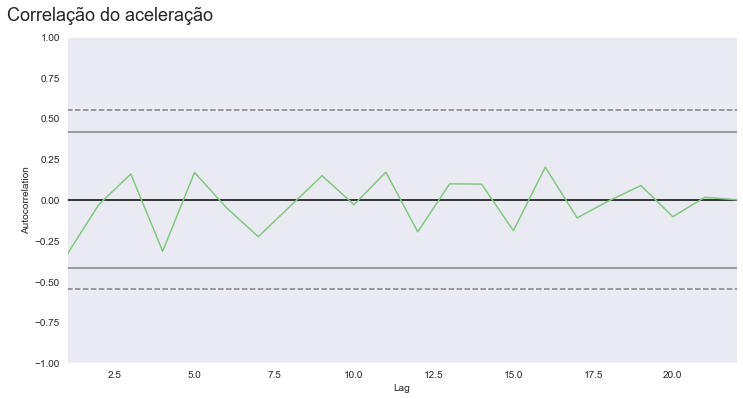

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aceleração', fontsize=18, x=0.175, y= 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [25]:
assinantes = pd.read_csv('newsletter_alucar.csv')

In [26]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


Verificando as colunas 'mes' e 'assinantes' é possivel verificar que a coluna 'mes' se trata do mes do ano e a coluna 'assinantes' a quantidade de assinante por mês.

In [27]:
#Verificamos a quantidade de linhas e colunas do DataFrame
assinantes.shape

(24, 2)

In [28]:
#Verificamos os tipos de cada coluna.
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

Com isso percebemos que a coluna 'mes' é do tipo object, devemos transformar para o tipo datetime

In [29]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [30]:
#Verificando novamente o tipo para sabermos se transformou para datetime.
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [31]:
#Precisamos descobrir a quantidade de dados nulos, para isso usarei .isna()
assinantes.isna().sum().sum()

0

In [32]:
#Da mesma forma que fizemos o .diff no aumento e aceleracao do DataFrame alucar, faremos para assinantes.
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [33]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


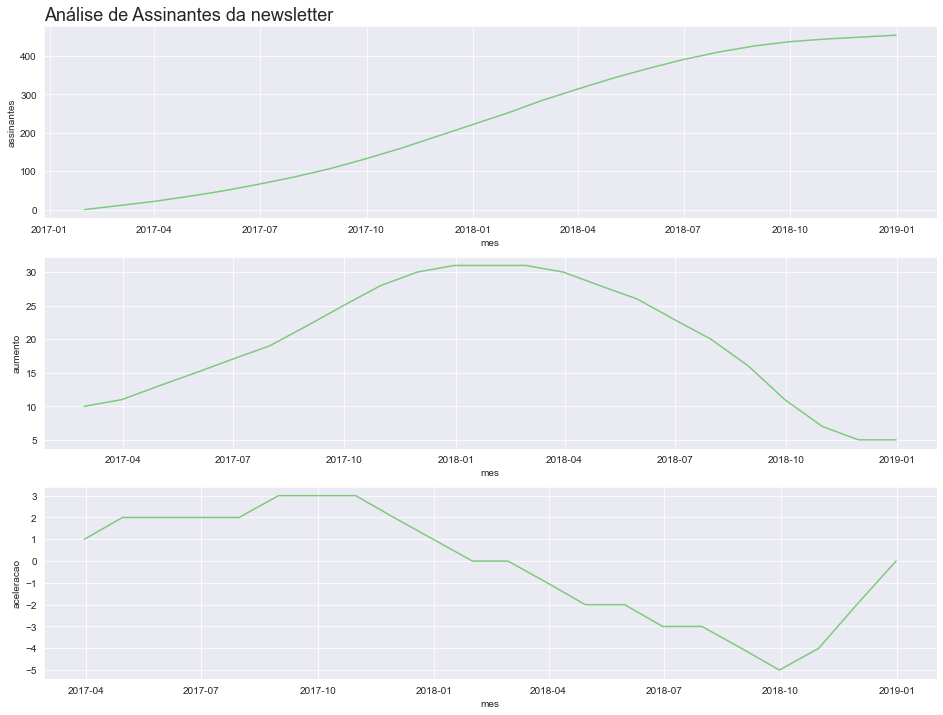

In [34]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de Assinantes da newsletter')

# Chocolura - Analisando as vendas

O problema é que em determinado período do ano, a empresa não dá conta da demanda. Por mais que produza, não tem sido o suficiente. Tentaremos descobrir o que está acontecendo com as vendas da Chocolura.

In [35]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [36]:
chocolura.shape

(24, 2)

In [37]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [38]:
chocolura.isna().sum().sum()

0

In [39]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [40]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [41]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


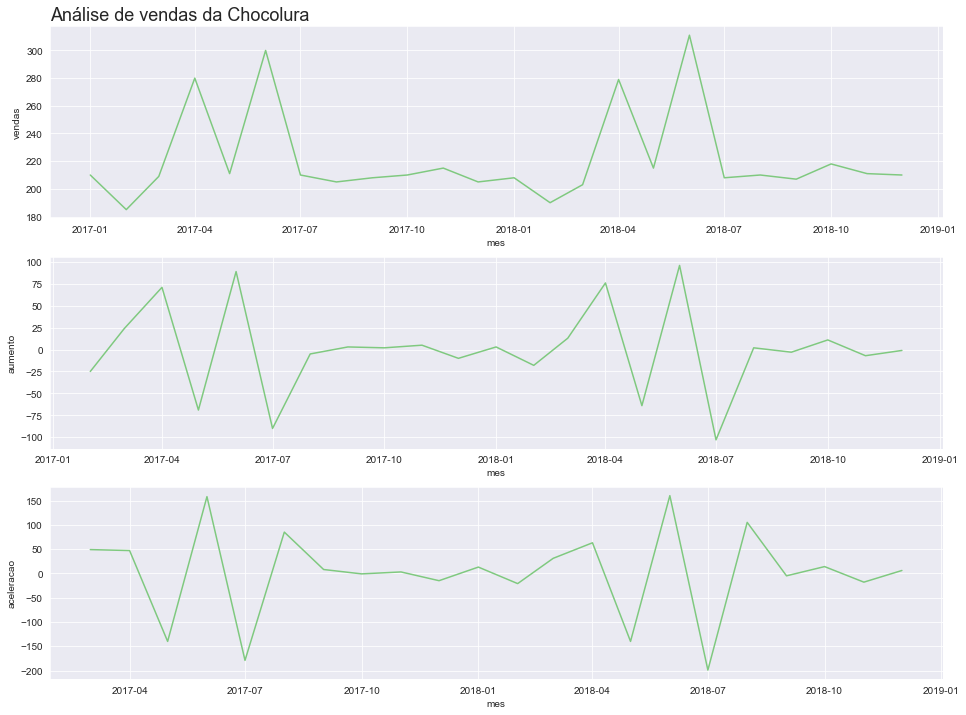

In [42]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura')

É possivel verificar que temos picos de vendas em Abril e Junho, isso provavelmente ocorre devido a Pascoa no mês de Abril e dia dos Namorados em Junho.

# Chocolura - Vendas diárias (Outubro e Novembro)

Uma loja em especial chamou muito a atenção dos diretores da empresa pelas vendas diárias nos meses de Outubro e Novembro de 2018. Tentaremos analisar o que terá acontecido.

In [43]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [44]:
vendas_por_dia.shape

(61, 2)

In [45]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [46]:
vendas_por_dia.isna().sum().sum()

0

In [47]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [48]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [49]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


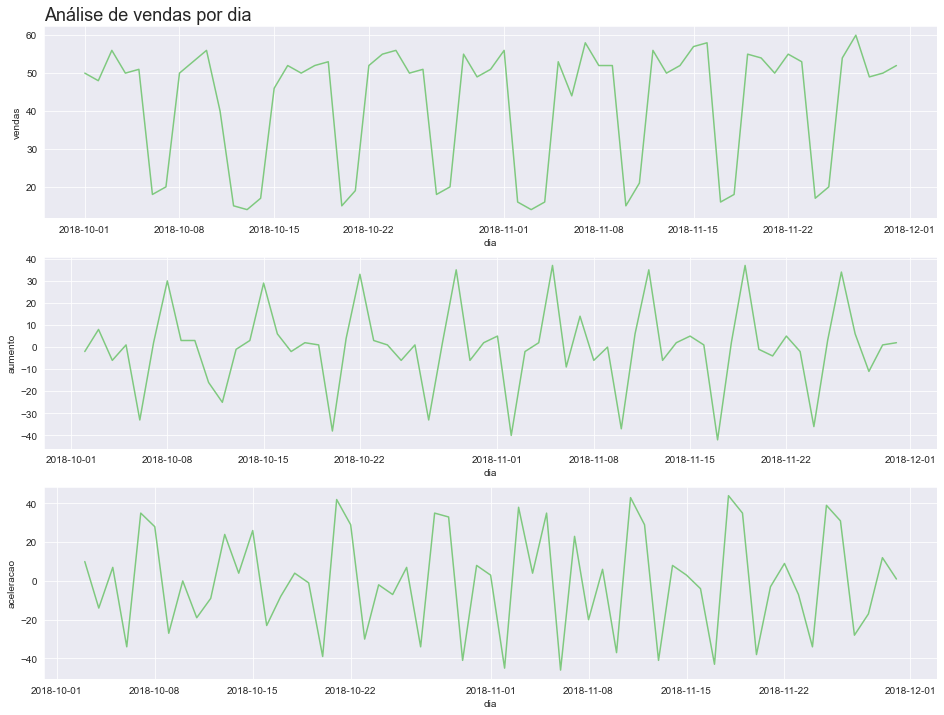

In [50]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas por dia')

**Analisando a sazonalidade**

In [51]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [52]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [53]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [54]:
dias_traduzidos = {'Monday' : 'Segunda',
                   'Tuesday' : 'Terça',
                   'Wednesday': 'Quarta',
                   'Thursday' : 'Quinta',
                   'Friday': 'Sexta',
                   'Saturday': 'Sábado',
                   'Sunday': 'Domingo'}

In [55]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [56]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


# Agrupando os dias

In [57]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

C:\Users\Jose Eduardo\AppData\Local\Temp\ipykernel_4944\759150623.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


**Correlação das vendas diárias**

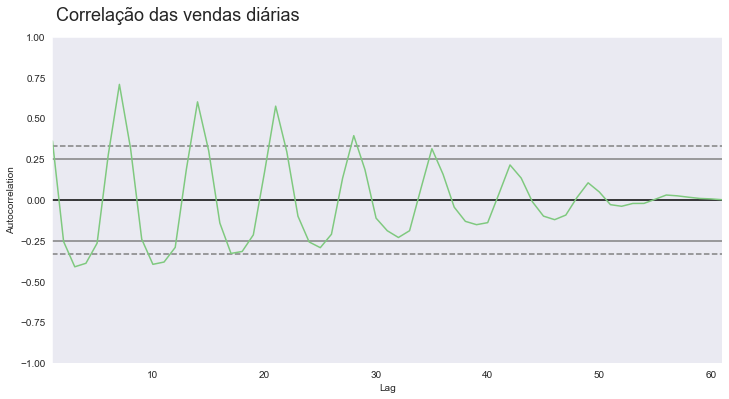

In [60]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.27, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

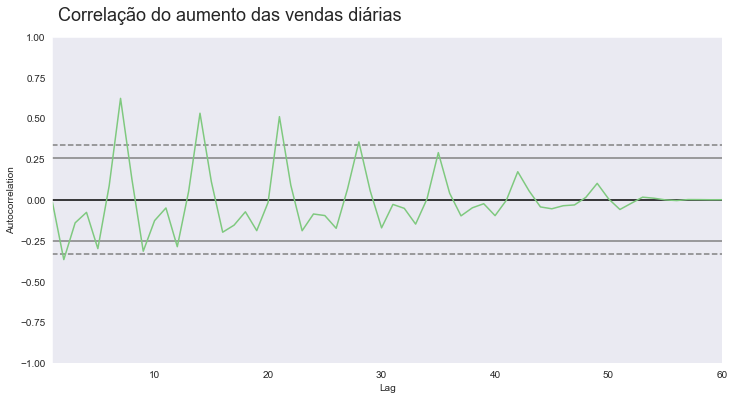

In [63]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.33, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

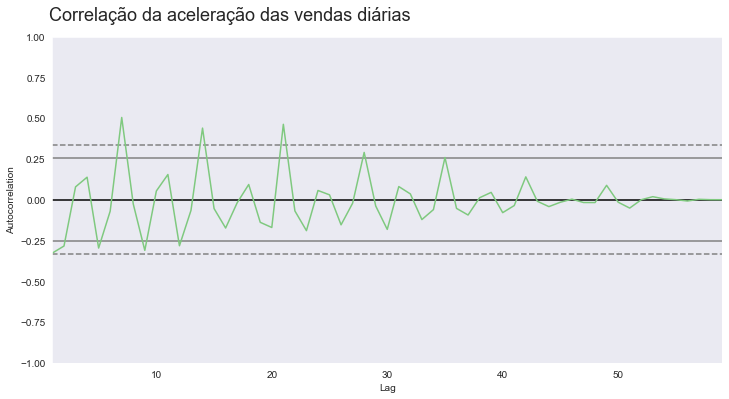

In [65]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.33, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de vendas

In [66]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [67]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

Como a coluna 'mes' está com o tipo object, devemos transformar no tipo datetime.

In [68]:
cafelura['mes']= pd.to_datetime(cafelura['mes'])

In [69]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [70]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


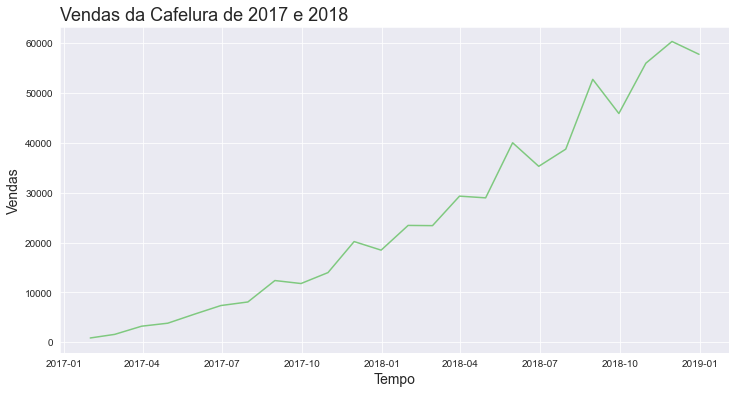

In [71]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [72]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')

In [73]:
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [74]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [75]:
quantidade_de_dias_de_fds['quantidade_de_dias'].shape

(24,)

In [76]:
len(quantidade_de_dias_de_fds)

24

In [77]:
cafelura['vendas_normalizadas']= cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head

<bound method NDFrame.head of           mes  vendas  vendas_normalizadas
0  2017-01-31     880                110.0
1  2017-02-28    1600                200.0
2  2017-03-31    3240                324.0
3  2017-04-30    3840                480.0
4  2017-05-31    5670                630.0
5  2017-06-30    7380                820.0
6  2017-07-31    8096               1012.0
7  2017-08-31   12390               1239.0
8  2017-09-30   11792               1474.0
9  2017-10-31   13984               1748.0
10 2017-11-30   20200               2020.0
11 2017-12-31   18480               2310.0
12 2018-01-31   23436               2604.0
13 2018-02-28   23392               2924.0
14 2018-03-31   29304               3256.0
15 2018-04-30   28960               3620.0
16 2018-05-31   40000               4000.0
17 2018-06-30   35280               4410.0
18 2018-07-31   38720               4840.0
19 2018-08-31   52710               5271.0
20 2018-09-30   45864               5733.0
21 2018-10-31   55944   

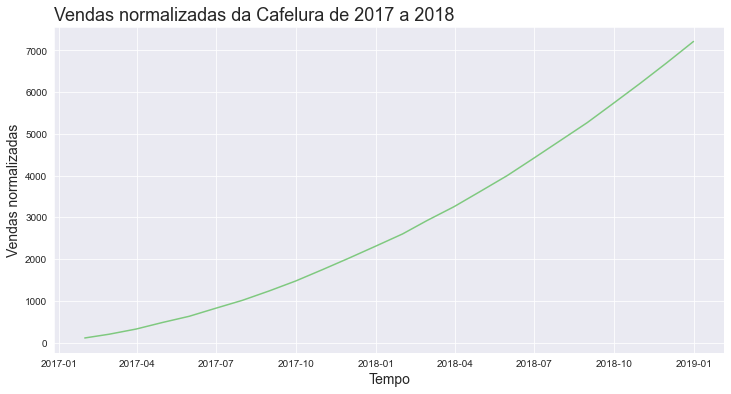

In [78]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)



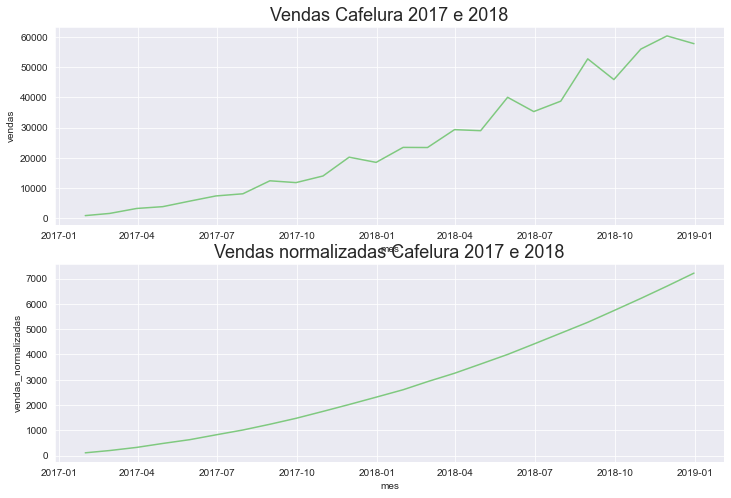

In [79]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax 

# Statsmodels

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [90]:
chocolura['vendas']

0     210
1     185
2     209
3     280
4     211
5     300
6     210
7     205
8     208
9     210
10    215
11    205
12    208
13    190
14    203
15    279
16    215
17    311
18    208
19    210
20    207
21    218
22    211
23    210
Name: vendas, dtype: int64

**Carderno com possiveis soluções para dados nulos**

https://colab.research.google.com/drive/1UZFN5Jke6gFgYLNMbsU7eBJ9Pk9TdpIm

# Alucel - Análise de vendas

**Nos foram passados os dados de uma determinada empresa do ramo de telefonia e celulares. Foi pedido que avaliássemos o rendimento da empresa.**

In [92]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [93]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [94]:
alucel['dia']= pd.to_datetime(alucel['dia'])

In [95]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [96]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [97]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()

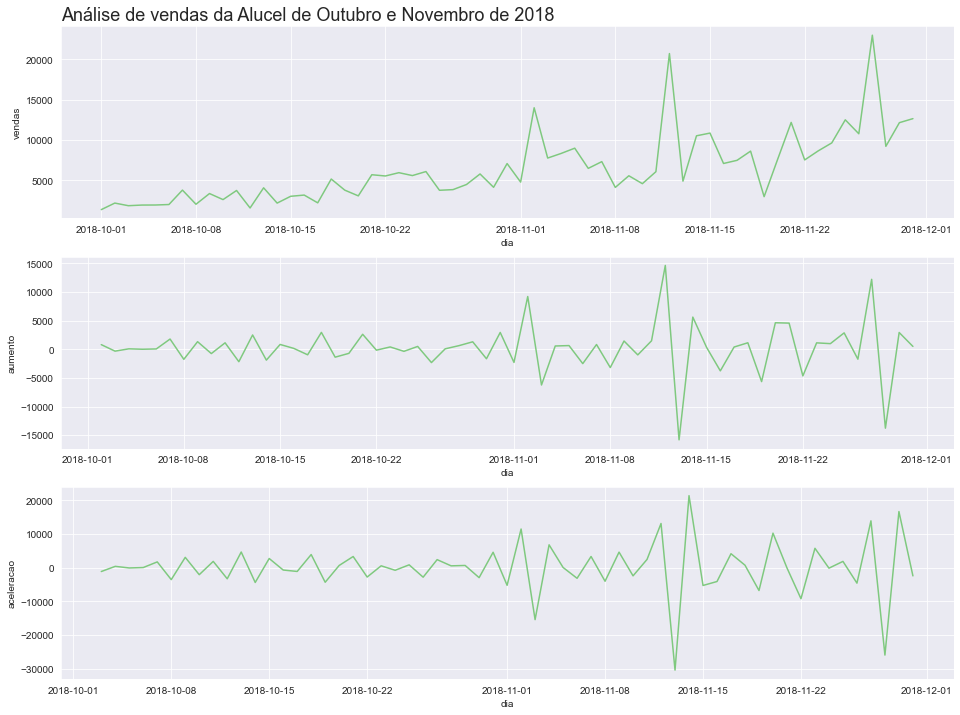

In [98]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

Vimos muitos ruídos na Análise de vendas da Alucel de Outubro e Novembro de 2018. Há dias em que os valores das vendas foram muito altos, e em outros, muito baixos. Então, temos bastante frequência em diferentes pontos.

Existe uma técnica muito conhecida e utilizada para a redução desses ruídos, a Média Móvel. A ideia é tentar minimizar os ruídos de uma série temporal através de médias móveis, pegando dois ou mais pontos e calculando uma média de 7 dias entre eles. Depois, é calculada a média de mais 7 dias, e os pontos serão marcados para minizar a dispersão da frequência.

**Média Móvel**

In [99]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [101]:
alucel

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
...,...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84,9840.835714
57,2018-11-27,22984.56,12211.03,13937.49,12037.211429
58,2018-11-28,9216.26,-13768.30,-25979.33,11613.995714
59,2018-11-29,12147.61,2931.35,16699.65,12273.428571


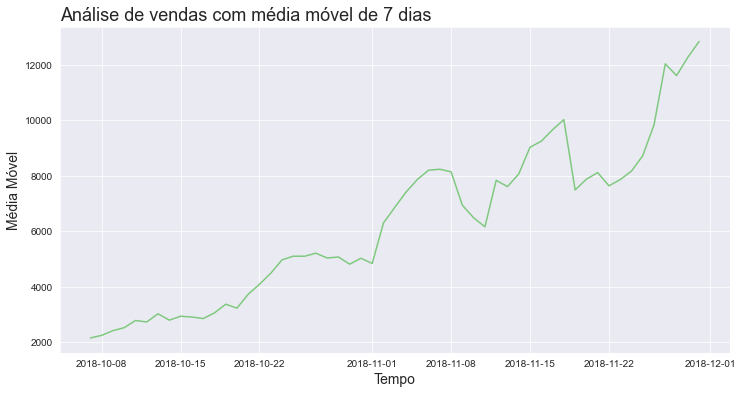

In [102]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [103]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

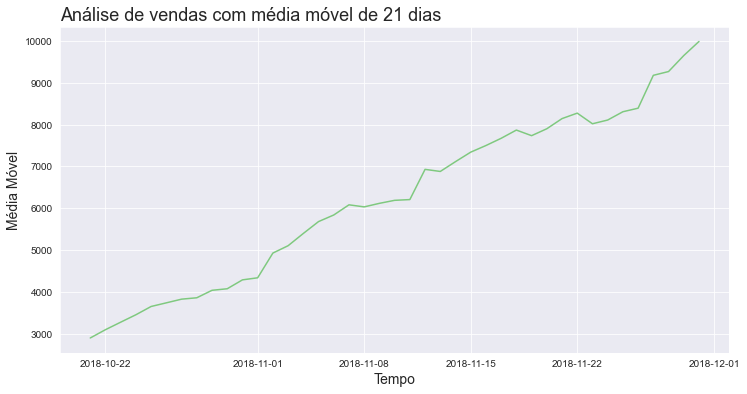

In [104]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

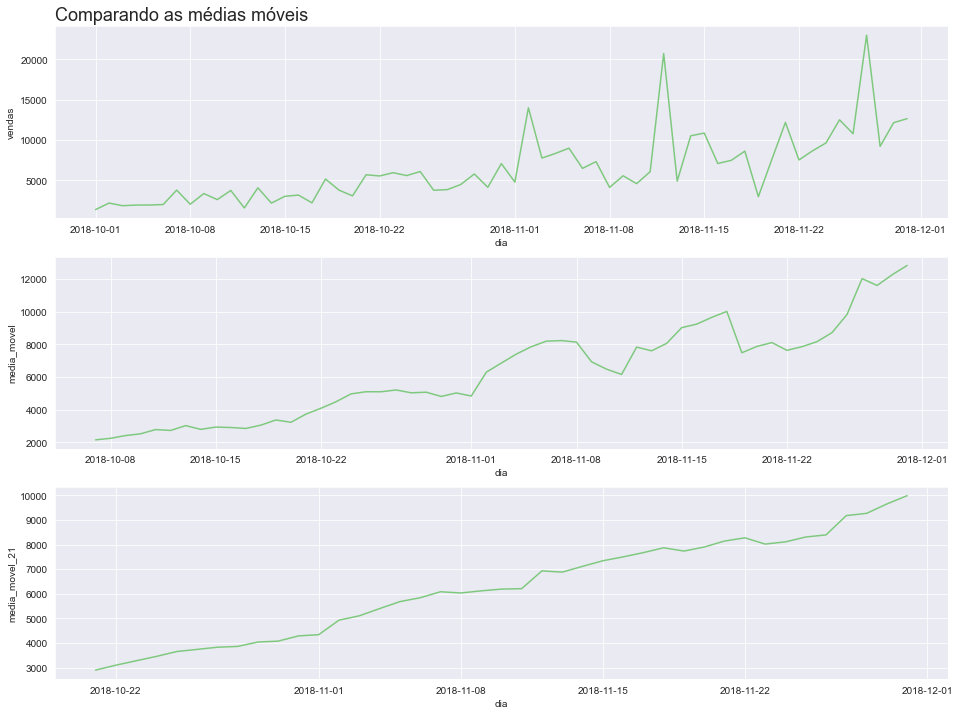

In [105]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')